# Courseware Guide for Principles of Planetary Climate

## ClimateUtilities.py

ClimateUtilities is my all-purpose collection of input-output, graphics and numerical analysis utilities used in support of the exercises. It is used so universally in the rest of the courseware that to avoid having to type ClimateUtilities frequently, we import it without its own namespace. Let's do that now:

In [45]:
import sys
sys.path.append(r'D:\Users\thomas\Coding\Python\climate\python3')

In [46]:
import numpy as np
import ClimateUtilities as cu
import ClimateGraphicsMPL as cg

### The Curve object

The `Curve` object is an all-purpose data object I cooked up in order to make it easier to read, write, manipulate and plot tabular data.  A `Curve` object is designed to contain a set of columns of equal length. You can pick one of the columns (by default it's the first) and think of that as a coordinate (e.g. altitude).  The rest of the columns give the values of some quantities corresponding to each coordinate value in the first column.  

The first step in using a `Curve` object is to create one.  You can of course create as many as you need, with whatever names strike your fancy.  Here we create a `Curve` object called `c`

In [47]:
c = cu.Curve()

Having created it, we can now put some data in it. This is done with the `addCurve(...)` method. The first argument is any indexable collection of numbers (e.g. a list of floats, or a ` array`.  The second argument is optional. If present, it is a string that gives the name of the column.  If the name is absent, the `addCurve(...)` method will make up a name for you.  

In [48]:
c.addCurve(list(range(10)),'x')

You refer to a column of data using its name, and the name of the column is treated as an "index" into the data. Here's a simple example, also illustrating that what is returned by the indexing operation is an array that you can do array arithmetic on:

In [49]:
print(c['x'])
print(c['x']**2)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


Now let's add a second data column, which we'll call `y`

In [50]:
yData = [2.*xx**2 for xx in range(10)]
c.addCurve(yData,'y')

If you ever need to know what the names of the columns in a `Curve` object are, just use the method `listVariables()`:

In [51]:
c.listVariables()

['x', 'y']

You can do arithmetic on columns, and even store the results in a new named column, which will be created automatically:

In [52]:
c['y'] = c['y'] + 1.
c['z'] = 10.*c['x'] + c['y']
print(c['y'])
print(c['z'])

[   1.    3.    9.   19.   33.   51.   73.   99.  129.  163.]
[   1.   13.   29.   49.   73.  101.  133.  169.  209.  253.]


You can save your data to a tab-delimited text file using the `dump(...)` method.  The argument of the method is the filename:

In [53]:
c.dump('MyData.txt')

You can read tabular data into a `Curve` object using the `readTable(...)` function in ClimateUtilities. Note that `ReadTable(...)` is not a method of a `Curve` object. It is just a stand-alone function, since it *returns* a newly created `Curve` object. Here we are reading our data back in again:

In [54]:
cNew = cu.readTable('MyData.txt')
print(cNew['y'])

[   1.    3.    9.   19.   33.   51.   73.   99.  129.  163.]


You can make a new Curve object consisting of a subset of the original data, by using the extract(...) method. The argument of extract(...) is a list of the names of the curves you want to extract.

In [55]:
cSubset = c.extract(['x','z'])
print(cSubset.listVariables())

['x', 'z']


### Line plots with Curve objects

One of the many things you might like to do with a `Curve` object is to plot it. This is done using the `ClimateUtilities` `plot(...)` function (not to be confused with plot commands in other graphics packages, such as `pylab`).  The `ClimateUtilities` `plot` command is actually designed to provide an interface to a range of different plotting packages -- it doesn't actually do the plot itself, but just turns what you want to do into commands the actual plotting package uses. This means that you won't have to change your programs if you or your sysadmin decides to change the plot package supported. The most widely supported plot package for Python is `MatPlotLib` (i.e. `pylab`), and this is the default the ClimateUtilities uses for drawing its plots.

If you are using MatPlotLib as the graphics driver. the following command will cause the graphics to appear inline in the page, instead of in a separate window. 

In [56]:
%matplotlib inline

And here is an example plotting the `Curve` `c` defined earlier

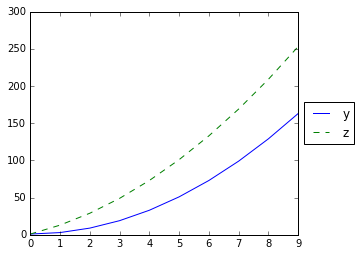

In [57]:
cg.plot(c)

You can add axis labels and plot titles by setting options on the `Curve` object

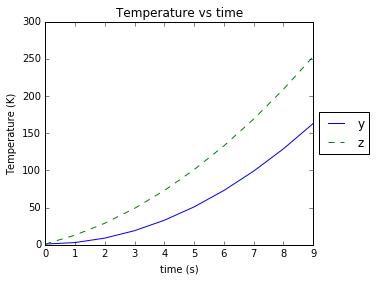

In [58]:
c.Xlabel = 'time (s)'
c.Ylabel = 'Temperature (K)'
c.PlotTitle = 'Temperature vs time'
cg.plot(c)

You can switch and reverse axes

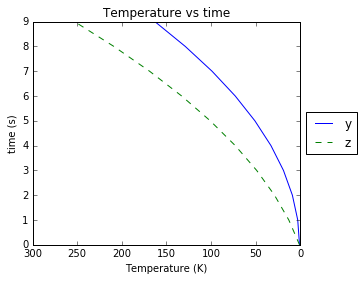

In [59]:
c.switchXY = True
c.reverseX = True
cg.plot(c)

You can use logarathmic axes

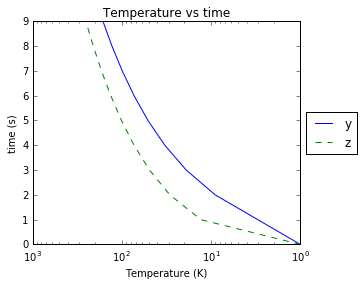

In [60]:
c.XlogAxis = True
cg.plot(c)

You can also change the column that is considered to be the thing everything else is plotted agains. This only is needed for Curves with more than two columns (otherwise it would just have the same effect as switching axes)

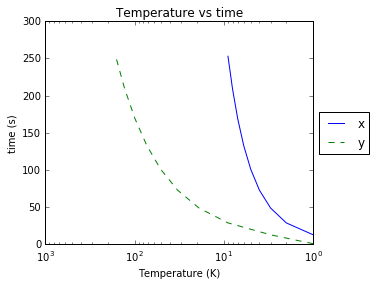

In [61]:
c.Xid = 'z'
cg.plot(c)

You can plot multiple different Curve objects on the same graph by giving multiple Curves in the argument list of plot(...).  The Curve objects need not all have the same number of points

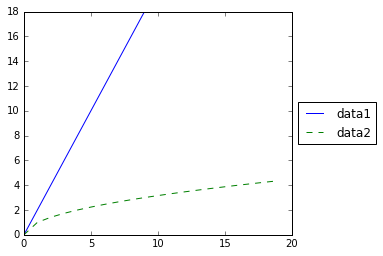

In [62]:
c1 = cu.Curve()
c1.addCurve(range(10),'time')
c1.addCurve([2.*x for x in range(10)], 'data1')
c2 = cu.Curve()
c2.addCurve(range(20),'time1')
c2.addCurve([x**.5 for x in range(20)],'data2')
cg.plot(c1,c2)

When doing plots with multiple Curves, any plot options like axis labels and plot titles are taken from the first Curve in the argument list. 

### Contour Plots of arrays

Watch This Space

### Numerical Analysis

The ClimateUtilites module includes a number of basic numerical analysis routines. Most of these are written as classes, that create objects that do some desired numerical operation.  

#### Root finding by Newton's method

`newtsolve(...)` creates an object that finds roots of a function using Newton's method.  Here is an example of creating a root finder object for the problem $ x^2 - a = 0$. The object created is called `m`, but you could use any other Python name.

In [63]:
def f(x):
    return x*x - a
m = cu.newtSolve(f)

And here is an example of using it to find a root.  `m` is a *callable object*, whose argument is the initial guess at the root.  The way the function `f(...)` has been written the parameter `a` is specified as a global. After being called, if the root finding is successful, `m` returns the root.

In [64]:
a = 2.
m(5.)

1.4142135623730951

In simple cases, setting function arguments as globals works find, but sometimes this can become cumbersome and error prone. The `newtSolve` class allows for passing of an object (of any type) which can contain parameters.  Here's an example where the parameters of the function are passes as a list of two values

In [65]:
def f(x,params):
    n,a = params
    return x**n - a
m = cu.newtSolve(f)
m.setParams([3.,2.]) #n=3,a=2
print(m(5.))
m.setParams([4.,2.]) #n=4, a=2
print(m(5.))

1.2599210498948732
1.189207115002721


By default 'newtSolve' computes the derivative of the input function using the secant method (finite difference), but there is also an option to specify the derivative as a function. There are additional options. You can learn about them by typing `help(newtSolve)`

#### Quadrature

Numerical quadrature is the process of evaluating a definite integral such as 

$$\int_a^b f(x) dx$$

There are many ways of numerically implementing quadrature. Trapezoidal rule is a simple one. The ClimateUtilities class 'romberg' implements the Romberg interpolation method, which gives a highly accurate approximation to a definite integral, if the function $f$ is reasonably smooth.  (It can behave poorly if the function has discontinuities).  Here is an example of the use of the class to create a quadrature object called `m` for a function called `f`

In [66]:
def f(x):
    return x
m = cu.romberg(f)

The object created is a callable object. The first argument is a pair of numbers (specified as a list or tuple) which give the limits of integration. The second argument is optional, and can be used to pass a set of parameters if the function needs it  Here we are using the object to evaluate the integral between $x=0$ and $x=1$.

In [67]:
m([0.,1.])

0.5

Here's an example of a function that needs parameters specified. (This could also be done by treating the parameters as globals).  As in the previous example, we pass the parameters as a list of values, but the parameter argument can be any Python object at all, and can even include function names. In fact, in this case, one of the "parameters" passed is a function, `g`.

In [68]:
import math #So we can use the exponential
def f(x,MyParams):
    g,n,tau = MyParams
    return math.exp(-g(x)**n/tau)
def g(x):
    return x*x
m = cu.romberg(f)
m([0.,1.],[g,2.,2.])

0.91242792766439229

In a case like this, where you might not need the function `g` again, you could use a `lambda` function as the parameter argument and save several lines. Here we are doing the integral for the case $g(x) = x\sin(x)$

In [69]:
m([0.,1.],[lambda x: x*math.sin(x),2.,2.])

0.92882728998413955

#### Interpolation

The class `interp` takes a list of $x$ values and a list of corresponding $y$ values
(of the same length) and creates a function (actually a callable object) that takes an arbitrary $x$ value as its argument and produces the interpolated $y$ value based on the input table.  It uses polynomial interpolation using the closest $n$ tabulated points on either side of the argument. By default, $n=4$, but you can specify other values by passing $n$ as an optional third argument to the creator. Here is an example using the default interpolation

In [70]:
xPoints = [0.,.5,1.,1.5,3.,5.,10.]
yPoints = [1./(1.+x) for x in xPoints]
MyFun = cu.interp(xPoints,yPoints)

And here we are evaluating the function at a few points and comparing the values to the function used to make up 'yPoints'

In [71]:
print(MyFun(1.25), 1./(1.+1.25))
print(MyFun(4.), 1./(1.+4.))
print(MyFun(7.), 1./(1.+7.))

0.445199677438 0.4444444444444444
0.184090909091 0.2
0.05 0.125


Here we are trying again with a smaller number of points used in the interpolation

In [72]:
MyFun = cu.interp(xPoints,yPoints,1)
print(MyFun(1.25), 1./(1.+1.25))
print(MyFun(4.), 1./(1.+4.))
print(MyFun(7.), 1./(1.+7.))

0.45 0.4444444444444444
0.208333333333 0.2
0.136363636364 0.125


This ilustrates the point that sometimes using too many points in an interpolation can introduce wiggles and make the result worse. The 2-point (linear) interpolation works better than the 8-point interpolation for the larger values of $x$

#### Numerical integration of ordinary differential equations

The class `integrator` creates an object that numerically integrates ordinary differential equations of the form 

$$ \frac{dY}{dt} = F(t,Y) $$

$Y$ is the dependent variable snd $t$ is the independent variable. In your own application, these might have different names.  This equation could represent a first order system in which the solution $Y(t)$ is just a real (or complex) valued function of $t$, but it could also represent a higher order system in which both $Y$ and the slope function $F$ are vectors (arrays). 

`integrator` uses the Runge-Kutta method for carrying out the integration.

The first argument of `integrator`  is the function defining the slope ($F$ in the equation above). The second argument is the initial value of the independent variable ($t$ above) and the third argument is the initial value of the dependent variable $Y$ above.

First, here's an example for a first order system with $F(t,Y) = - Y$.  We'll use different names for $Y$,  $F$ and $t$ just to emphasize that you an choose whatever names that help you remember what you are computing

In [73]:
def slope(x,Z): #Function must have independent variable as an argument, even if not used
    return -Z 
xStart = 0.
ZStart = 1.
m = cu.integrator(slope,xStart,ZStart)

And here we are using the integrator. The method that steps the solution from one value of the independent variable to the next (an increment `dx` further on) is called `next` and takes the increment `dx` as an argument (smaller is usually more accurate). It returns a list containing the new value of the independent and dependent variable. Here is a typical use in a loop. This loop compares the approximate result to the exact result.

In [74]:
x = xStart
xFinish = 5.
while x<xFinish:
    x,Z = m.next(.5)
    print(x,Z,math.exp(-x))


0.5 0.6067708333333334 0.6065306597126334
1.0 0.3681708441840278 0.36787944117144233
1.5 0.2233953299345794 0.22313016014842982
2.0 0.1355497705071797 0.1353352832366127
2.5 0.08224764720878353 0.0820849986238988
3.0 0.049905473436579584 0.049787068367863944
3.5 0.030281185705007926 0.0301973834223185
4.0 0.018373740284549078 0.01831563888873418
4.5 0.011148649703906083 0.011108996538242306
5.0 0.006764675471380514 0.006737946999085467


Here's an example for a case where the slope function has parameters. It works similarly to `newtSolve`. Again, the parameter object can be any Python object at all. 

In [75]:
def slope(x,Z,Constants):
    a,n = Constants
    return -a* x**n * Z
m = cu.integrator(slope,xStart,ZStart)
m.setParams([.1,2]) #Sets the parameter object to correspond to a = .1, n=2
                    #This will be passed to slope as the object called Constants
x = xStart
while x<5.:
    x,Z = m.next(.5)
    print(x,Z)

0.5 0.9958414611816406
1.0 0.9672150411245334
1.5 0.893595710161651
2.0 0.7659257673984696
2.5 0.5940241249706562
3.0 0.406591183688796
3.5 0.2396240906779104
4.0 0.11877174615174955
4.5 0.048568654378555634
5.0 0.016294984937618502


More typically, you'd want to save the results for plotting. Here's an example that shows you a typical method for doing this, by accumulating results in a list. 

We recreate the integrator to reset the starting values, which is usually the least confusing way to do this. (Future implementations of `integrator` will provide a more convenient way to restart).

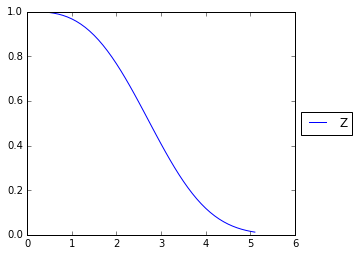

In [76]:
m = cu.integrator(slope,xStart,ZStart)
m.setParams([.1,2])

xList = [xStart]
ZList = [ZStart]
x=xStart
while x<5.:
    x,Z = m.next(.1) #Use a smaller step
    xList.append(x)
    ZList.append(Z)
#Put the data in a Curve object and plot
c = cu.Curve()
c.addCurve(xList,'x')
c.addCurve(ZList,'Z')
cg.plot(c)

Now we'll illustrate how to integrate a higher order system. As our example we'll use the system

$$ \frac{dx}{dt} = - y , $\frac{dy}{dt} = x$$

which will be re-cast in the vector form

$$\frac{d}{dt} \left[ \begin{array}{c} x\\y \end{array} \right] = \left[ \begin{array}{c} -y\\x \end{array} \right] $$

Thus the slope function $F$ is the vector on the right hand side, and the "state variable" is the vector on the left hand side, which we'll call $S$. $F$ is a function of $S$.

Here is how we implement the solution. `integrator` is used exactly the same way. All we need to do is to write the slope function so that it takes a `numpy` array as input and produces a `numpy` array as output. Note that the array returned must be a *newly created* array . The initial value for the dependent variable given to `integrator` must also be a `numpy` array.

In [77]:
def F(t,S):
    x,y = S
    return np.array([-y,x])
tStart = 0.
SStart = np.array([1.,0.])
m = cu.integrator(F,tStart,SStart)

And here we are doing the integration and plotting the results in the x-y plane

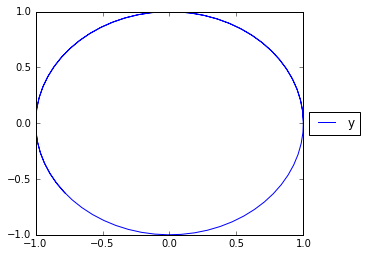

In [78]:
SList = [SStart]
t = tStart
while t<10.:
    t,S = m.next(.1)
    SList.append(S.copy()) #Need to make a copy, otherwise list just contains all refs to same S!

#SList is a list of numpy arrays. The following separates out the x values and y values
xL = [S[0] for S in SList]
yL = [S[1] for S in SList]
#Put in a Curve object and plot
c = cu.Curve()
c.addCurve(xL,'x')
c.addCurve(yL,'y')
cg.plot(c)

Did you expect to see a circle? I hope so!

## phys.py

Watch This Space

## planets.py

Watch This Space